# Word cloud plots for presentation and manuscript
Created by Ivan Lima on Tue Jun  8 2021 15:03:24 -0400

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud, datetime
print('Last updated on {}'.format(datetime.datetime.now().ctime()))

Last updated on Wed Aug 11 10:15:25 2021


In [2]:
plt.rcParams['figure.dpi'] = 100
pd.options.display.max_columns = 30

npzfile = np.load('results/NMF_TSNE.npz')
feature_names  = npzfile['feature_names']
nmf_components = npzfile['nmf_components']
topic_names    = npzfile['topic_names']
topic_names_r  = npzfile['topic_names_r']
npzfile.close()

data_types = {'Abstract':'string', 'Title':'string', 'Programs':'string', 'PI':'string',
              'Organization':'string', 'State':'string', 'Instrument':'string', 'co-PIs':'string',
              'program':'string', 'PI_first_name':'string', 'co-PI_first_name':'string',
              'PI_gender':'string', 'co-PI_gender':'string', 'award_type':'string'}
awards = pd.read_csv('results/awards_1985-2020_clean_edited_grouped_gender_topic.csv', index_col=0,
                     parse_dates=[4,5], dtype=data_types)
awards['year'] = awards.StartDate.dt.year
awards.loc[awards.program=='DATA NOT AVAILABLE','program'] = np.nan
awards['co-PI_female_pct'] = awards['co-PI_female_frac'] * 100

## Selected topics 

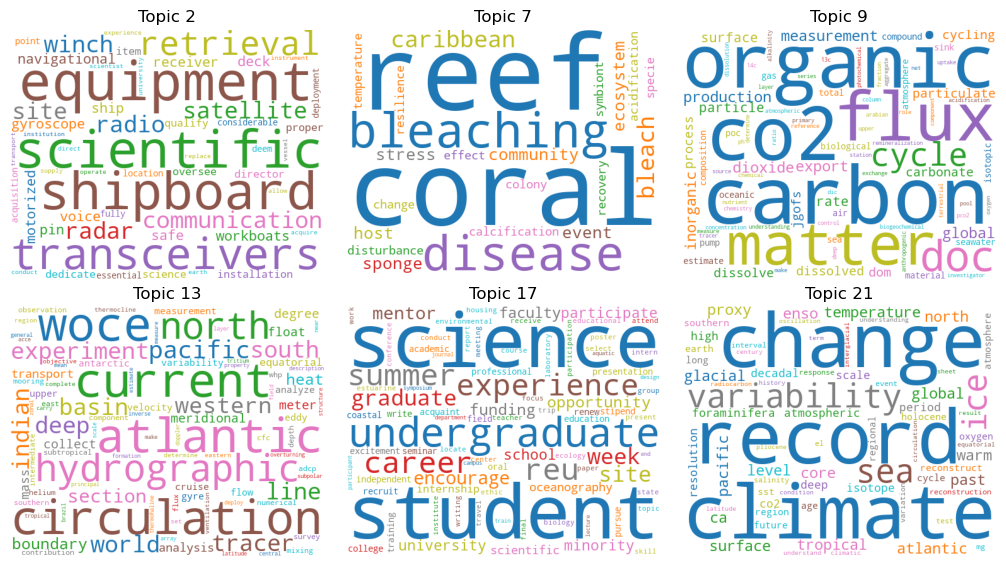

In [3]:
sort_by_feature = np.argsort(nmf_components, axis=1)[:,::-1]
nmf_components_sorted = np.take_along_axis(nmf_components, sort_by_feature, axis=1)
feature_names_sorted = feature_names[sort_by_feature]

word_freq = np.round(nmf_components_sorted * 5).astype(int)

topics = {}
topic_numbers = [2, 7, 9, 13, 17, 21]
for t in topic_numbers:
    topics[t] = []
    for n in range(len(feature_names)):
        if word_freq[t-1,n] > 0:
            topics[t] = topics[t] + [feature_names_sorted[t-1,n]] #* word_freq[t-1,n]

fig, axs = plt.subplots(2, 3, figsize=(13,7))
fig.subplots_adjust(wspace=0, hspace=0.1)
for ax, t in zip(axs.ravel(), topic_numbers):
    wc = wordcloud.WordCloud(background_color='white', width=500, height=400, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {}'.format(t))

## All topics 

### Compute topic relative frequencies 

,number of awards,percentage of total
shelf coastal transport 1,191,1.66
equipment scientific shipboard 2,288,2.50
instrumentation university shared 3,609,5.29
ridge mantle melt 4,686,5.96
wave internal turbulence 5,751,6.52
population larval specie 6,710,6.17
coral reef bleaching 7,321,2.79
workshop science international 8,763,6.63
carbon organic co2 9,442,3.84
sediment core organic 10,676,5.87


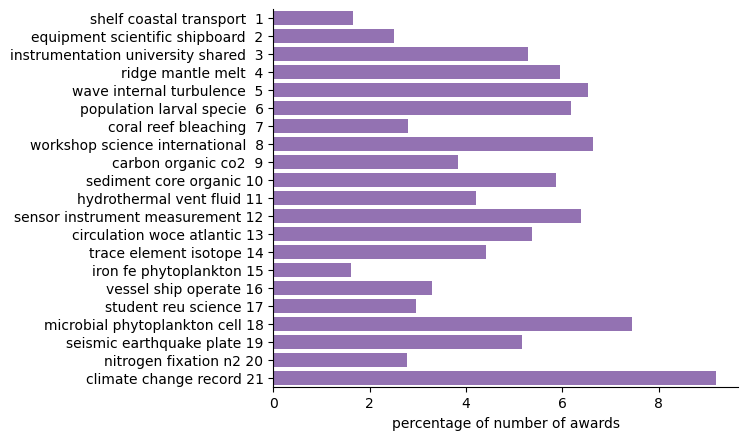

In [4]:
# res_topics = pd.DataFrame({'number of awards':awards.groupby('topic')['Abstract'].count().sort_values(ascending=False)})
res_topics = pd.DataFrame({'number of awards':awards.groupby('topic')['Abstract'].count()})
res_topics.index = topic_names[res_topics.index.values - 1]
res_topics['percentage of total'] = res_topics['number of awards'] / len(awards) * 100
# res_topics['cum percentage of total'] = res_topics['percentage of total'].cumsum() 

fig, ax = plt.subplots(figsize=(6,5))
_ = sns.barplot(data=res_topics, y=res_topics.index, x='percentage of total', orient='h', color='C4', ax=ax)
_ = ax.set(xlabel='percentage of number of awards')
sns.despine(fig)

res_topics.style.format('{:.2f}', subset=['percentage of total'])

In [5]:
res_topics = res_topics.reset_index().rename(columns={'index':'topic'})
res_topics.index = range(1,22)

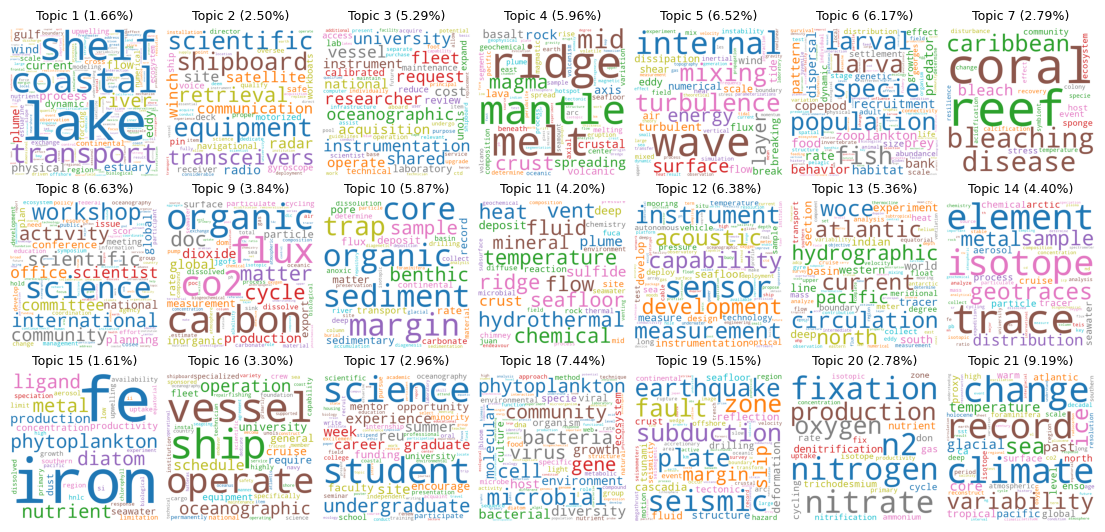

In [6]:
for t in range(1,22):
    topics[t] = []
    for n in range(len(feature_names)):
        if word_freq[t-1,n] > 0:
            topics[t] = topics[t] + [feature_names_sorted[t-1,n]] #* word_freq[t-1,n]

res_topics = res_topics.reset_index().rename(columns={'index':'topic'})
res_topics.index = range(1,22)

fig, axs = plt.subplots(3, 7, figsize=(14,6.75))
fig.subplots_adjust(wspace=0.05, hspace=0.05)
for ax, t in zip(axs.ravel(), range(1,22)):
    pct = res_topics.loc[t,'percentage of total']
    wc = wordcloud.WordCloud(background_color='white', width=500, height=500, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {} ({:.2f}%)'.format(t, pct), fontsize=9)

fig.savefig('figures/topics_wordcloud_talk.png',dpi=600,bbox_inches='tight')

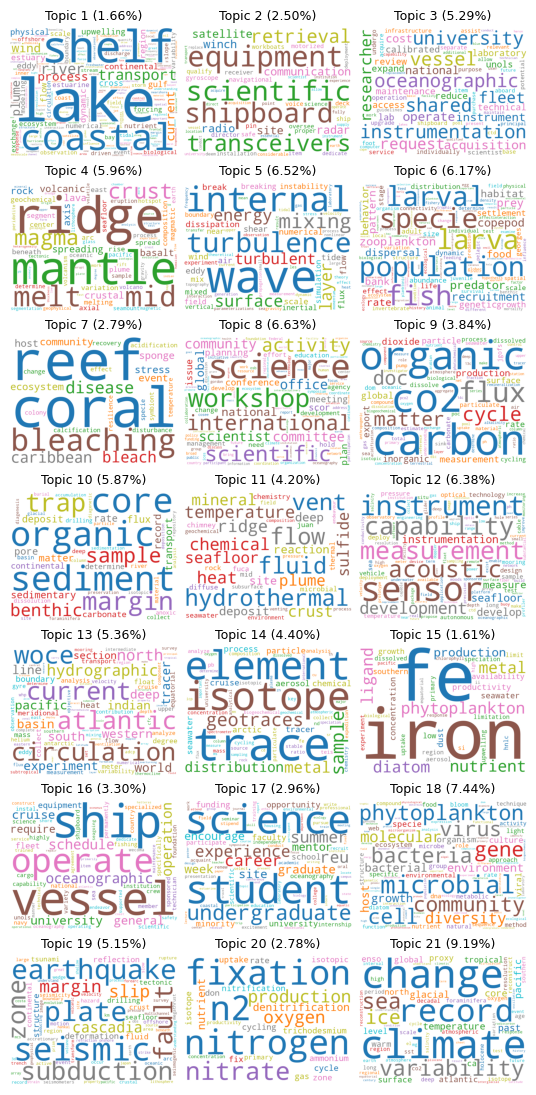

In [7]:
fig, axs = plt.subplots(7, 3, figsize=(6.75,14))
fig.subplots_adjust(wspace=0)
for ax, t in zip(axs.ravel(), range(1,22)):
    pct = res_topics.loc[t,'percentage of total']
    wc = wordcloud.WordCloud(background_color='white', width=650, height=500, colormap=plt.cm.tab10,
                         random_state=42, relative_scaling=0.5).generate(' '.join(topics[t]))
    _ = ax.imshow(wc)
    _ = ax.axis('off')
    _ = ax.set_title('Topic {} ({:.2f}%)'.format(t, pct), fontsize=9)

fig.savefig('figures/topics_wordcloud_paper.png',dpi=600,bbox_inches='tight')